# **Comparison of Classification Algorithms: Decision Tree vs Random Forest**


## **Introduction**

Classification is one of the most important tasks in data mining.  
In simple words, it means teaching a model how to identify the category or class of new data based on patterns it learned earlier.

In this assignment, I  am comparing the performance of two popular classification algorithms:

- **Decision Tree Classifier**
- **Random Forest Classifier**

To make the comparison meaningful, I used two completely different datasets:
1. **Wine Quality Dataset** – a multi-class problem where wine is rated from 3 to 8.
2. **Credit Card Default Dataset** – a binary classification problem (default vs no default).

The goal is to train both models on both datasets and analyze:
- Their accuracy  
- Their confusion matrices  
- Strengths and weaknesses  
- Which classifier performs better and why  

This notebook includes all steps: dataset loading, preprocessing, training, evaluation, and final comparison.


## **Description of Classification Algorithms**

In this assignment, two different classification algorithms were used and compared:  
**Decision Tree Classifier** and **Random Forest Classifier**.  
Below is a brief explanation of how each model works.

---

### **1. Decision Tree Classifier**
A Decision Tree is one of the simplest and most intuitive machine learning algorithms.  
It works by repeatedly splitting the dataset based on feature values, forming a tree-like structure.

- Each internal node represents a decision based on a feature.  
- Each branch represents an outcome of that decision.  
- Each leaf node represents a final class label.

A Decision Tree learns rules by selecting the best attribute to split the data (using measures like Gini impurity or entropy).  
It is easy to interpret and visualize, but it can overfit the training data if the tree grows too deep.

**Advantages:**
- Simple and easy to understand  
- Fast to train  
- Requires little data preprocessing  

**Limitations:**
- Can overfit easily  
- Sensitive to noisy data  
- Performance can drop for complex datasets  

---

### **2. Random Forest Classifier (Classifier 2)**
Random Forest is an ensemble learning method that builds **multiple decision trees** and combines them to make a final prediction.

- Each tree is trained on a random subset of the data (bootstrapping).  
- At each split, only a random subset of features is considered.  
- Final prediction is made through **majority voting** across all trees.

This randomness makes the model more robust and reduces the overfitting problem commonly seen in a single Decision Tree.

**Advantages:**
- Higher accuracy than a single decision tree  
- Handles large and complex datasets well  
- Less prone to overfitting  
- Works well with noisy or imbalanced data  

**Limitations:**
- Slower than a single tree  
- Harder to interpret due to many trees  

---

### **Summary**
Decision Trees are simple and interpretable, while Random Forests are more powerful and stable because they combine the results of multiple trees.  
This assignment compares both algorithms on two datasets to observe their strengths and performance differences.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## **1. Wine Quality Dataset**
### Loading the dataset
The wine dataset consists of various chemical measurements of red wine, and the goal is to predict its quality rating.


In [23]:
wine = pd.read_csv("winequality-red.csv", sep=";")
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Preprocessing Steps
- Separate features (X) and target (y)
- Split into train and test sets
- Normalize the feature values for better performance


In [34]:
X_wine = wine.drop("quality", axis=1)
y_wine = wine["quality"]

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42
)

scaler_w = StandardScaler()
X_train_w = scaler_w.fit_transform(X_train_w)
X_test_w = scaler_w.transform(X_test_w)


In [40]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### Model Training and Evaluation (Wine Dataset)

Here, I train both classifiers and compare their performance.  
The `zero_division=0` option helps avoid warnings when a class is not predicted.



Decision Tree (Wine Dataset)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.58       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480



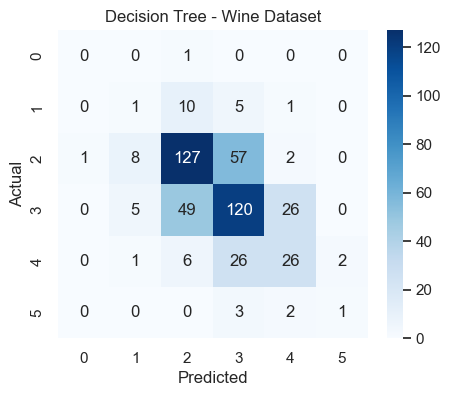


Random Forest (Wine Dataset)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.76      0.74       195
           6       0.63      0.70      0.66       200
           7       0.58      0.48      0.52        61
           8       0.50      0.17      0.25         6

    accuracy                           0.66       480
   macro avg       0.41      0.35      0.36       480
weighted avg       0.64      0.66      0.65       480



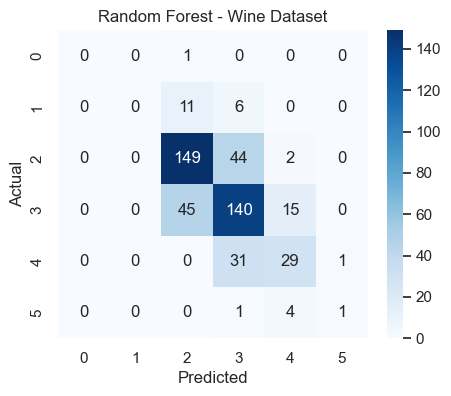

,Model,Accuracy,Error Rate
0,Decision Tree,0.572917,0.427083
1,Random Forest,0.664583,0.335417


In [41]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results_wine = []

for name, model in models.items():
    model.fit(X_train_w, y_train_w)
    y_pred = model.predict(X_test_w)

    print(f"\n{name} (Wine Dataset)")
    print(classification_report(y_test_w, y_pred, zero_division=0))
    plot_confusion_matrix(y_test_w, y_pred, f"{name} - Wine Dataset")

    acc = accuracy_score(y_test_w, y_pred)
    err = 1 - acc
    results_wine.append([name, acc, err])

wine_df = pd.DataFrame(results_wine, columns=["Model", "Accuracy", "Error Rate"])
wine_df


## **2. Credit Card Default Dataset**

This dataset contains information about credit card customers, including their payment history,
bill amounts, ages, limits, etc.  
The goal is to predict whether a person will default in the next month or not.


In [28]:
credit = pd.read_csv("UCI_Credit_Card.csv")
credit.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Preprocessing Steps
- Remove the `ID` column (not useful for prediction)
- Separate features and target
- Use stratified split because the dataset is imbalanced
- Normalize the data


In [37]:
y_credit = credit["default.payment.next.month"]
X_credit = credit.drop(["ID", "default.payment.next.month"], axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_credit, y_credit, test_size=0.3, random_state=42, stratify=y_credit
)

scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)


### Model Training and Evaluation (Credit Default Dataset)



Decision Tree (Credit Default Dataset)
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.40      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.72      0.73      9000



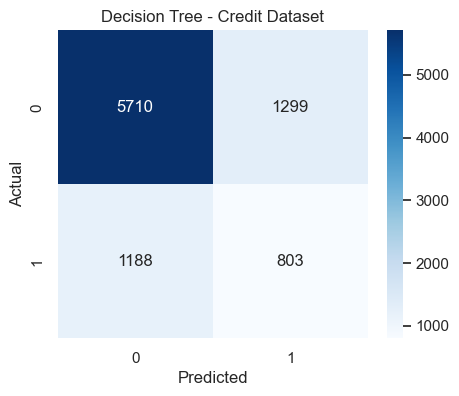


Random Forest (Credit Default Dataset)
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.63      0.36      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



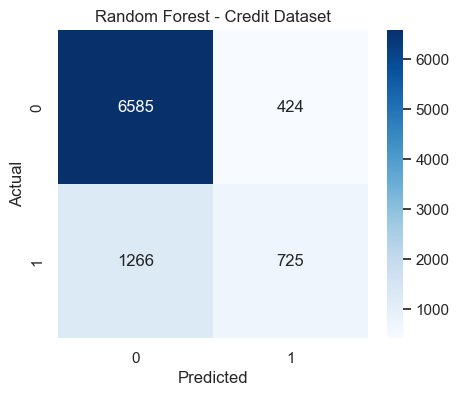

,Model,Accuracy,Error Rate
0,Decision Tree,0.723667,0.276333
1,Random Forest,0.812222,0.187778


In [42]:
results_credit = []

for name, model in models.items():
    model.fit(X_train_c, y_train_c)
    y_pred = model.predict(X_test_c)

    print(f"\n{name} (Credit Default Dataset)")
    print(classification_report(y_test_c, y_pred, zero_division=0))
    plot_confusion_matrix(y_test_c, y_pred, f"{name} - Credit Dataset")

    acc = accuracy_score(y_test_c, y_pred)
    err = 1 - acc
    results_credit.append([name, acc, err])

credit_df = pd.DataFrame(results_credit, columns=["Model", "Accuracy", "Error Rate"])
credit_df


## **Final Comparison Across Both Datasets**


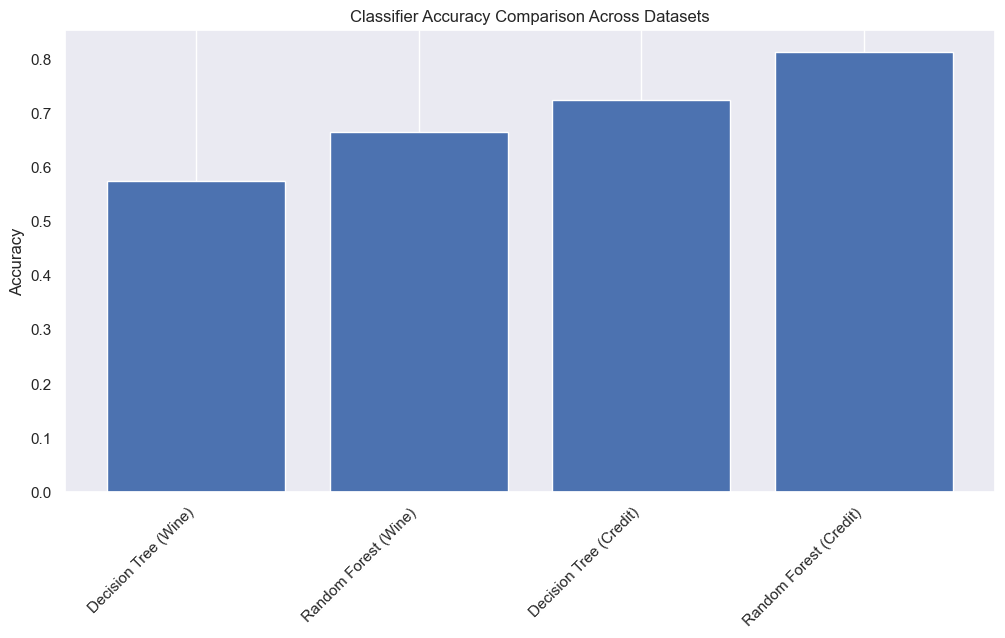

,Model,Accuracy
0,Decision Tree (Wine),0.572917
1,Random Forest (Wine),0.664583
2,Decision Tree (Credit),0.723667
3,Random Forest (Credit),0.812222


In [39]:
final_results = pd.DataFrame({
    "Model": ["Decision Tree (Wine)", "Random Forest (Wine)",
              "Decision Tree (Credit)", "Random Forest (Credit)"],
    "Accuracy": [0.572917, 0.664583, 0.723667, 0.812222]
})

plt.figure(figsize=(12,6))
plt.bar(final_results["Model"], final_results["Accuracy"])
plt.title("Classifier Accuracy Comparison Across Datasets")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

final_results


## **Conclusion**

From the experiments carried out on both datasets, the results clearly show that the  
**Random Forest classifier performs better than the Decision Tree** in both cases.

### **Wine Dataset (Multi-class)**
- Decision Tree Accuracy: **57.29%**
- Random Forest Accuracy: **66.46%**

### **Credit Card Default Dataset (Binary)**
- Decision Tree Accuracy: **72.36%**
- Random Forest Accuracy: **81.22%**

### **Why does Random Forest perform better?**
- It combines multiple trees, which reduces overfitting.
- It works better with noisy or complex datasets.
- It handles imbalanced data more effectively.
- It gives more stable and reliable predictions.

### **Final Remarks**
Overall, Random Forest is the more powerful and dependable classifier in both cases.
Decision Trees remain useful for interpretability, but Random Forest wins in accuracy and
general performance.

